In [1]:
#Use for multiclass
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import Binarizer
#Metric
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

In [2]:
X = pd.read_csv("train.csv")

In [3]:
y=X.pop("Survived")

In [4]:
#y=X['Survived']
y

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [5]:
test = pd.read_csv("test.csv")

In [6]:
X.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Schmidt, Mr. August",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [8]:
import matplotlib.pyplot as plt
X.boxplot(column=['Age'],grid=True)

In [9]:
#X["Age"].fillna(X["Age"].mean(), inplace=True)
X["Age"].fillna(29, inplace=True)
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.560236,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.005010,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test["Age"].mean()

30.272590361445783

In [16]:
test["Age"].fillna(X["Age"].mean(), inplace=True)
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.154603,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.636666,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
test["Fare"].fillna(X["Fare"].mean(), inplace=True)
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.619000
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.840751
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
X.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
list(X.dtypes[X.dtypes != "object"].index)

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [14]:
list(X.dtypes[X.dtypes!="object"].index)

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [15]:
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
numeric_variables.remove('PassengerId')
X[numeric_variables]

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
5,3,29.0,0,0,8.4583
6,1,54.0,0,0,51.8625
7,3,2.0,3,1,21.0750
8,3,27.0,0,2,11.1333
9,2,14.0,1,0,30.0708


In [16]:
from sklearn.preprocessing import StandardScaler

scaled_X = StandardScaler().fit_transform(X[numeric_variables])

In [17]:
pd.DataFrame(scaled_X)

,0,1,2,3,4
0,0.827377,-0.581659,0.432793,-0.473674,-0.502445
1,-1.566107,0.649327,0.432793,-0.473674,0.786845
2,0.827377,-0.273913,-0.474545,-0.473674,-0.488854
3,-1.566107,0.418517,0.432793,-0.473674,0.420730
4,0.827377,0.418517,-0.474545,-0.473674,-0.486337
5,0.827377,-0.043103,-0.474545,-0.473674,-0.478116
6,-1.566107,1.880313,-0.474545,-0.473674,0.395814
7,0.827377,-2.120392,2.247470,0.767630,-0.224083
8,0.827377,-0.196976,-0.474545,2.008933,-0.424256
9,-0.369365,-1.197152,0.432793,-0.473674,-0.042956


# Train Base Model- Using Numeric Values alone

In [18]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
#Try Base model with scaled data also
model.fit(scaled_X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [19]:
model.oob_score_
# w/o scaler = 0.6961695005913669
# w scaler = 0.13681410597870625

0.6936026936026936

## Categorical Data

In [20]:
categorical_variables=list(X.dtypes[X.dtypes == "object"].index)

In [21]:
X.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [22]:
categorical_variables

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [23]:
X[categorical_variables].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [24]:
X.drop(["Name", "Ticket","Cabin"], axis=1, inplace=True)
test.drop(["Name", "Ticket","Cabin"], axis=1, inplace=True)

In [25]:
categorical_variables = ["Sex", "Embarked"]

for variable in categorical_variables:
    X[variable].fillna("Missing", inplace=True)
    dummies = pd.get_dummies(X[variable], prefix=variable)
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [63]:
#X

In [26]:
for variable in categorical_variables:
    test[variable].fillna("Missing", inplace=True)
    dummies = pd.get_dummies(test[variable], prefix=variable)
    test = pd.concat([test, dummies], axis=1)
    test.drop([variable], axis=1, inplace=True)

In [42]:
#test

In [43]:
#X.describe()

In [44]:
#test.describe()

In [27]:
X.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Missing', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [28]:
test.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [29]:
X.drop(['PassengerId','Embarked_Missing'], axis=1, inplace=True)
test.drop(['PassengerId'], axis=1, inplace=True)

In [30]:
scaled_X = StandardScaler().fit(X).transform(X)

In [31]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(scaled_X, y)
model.oob_score_

0.8047138047138047

## Variable Importance Measures

In [35]:
# gives an array of the features in numerical form giving their order of importance
model.feature_importances_

array([0.09049   , 0.2495058 , 0.04815233, 0.03725125, 0.25364163,
       0.1214573 , 0.16666527, 0.01138153, 0.00749944, 0.01395544])

array([  9.11384671e-02,   2.38891052e-01,   4.43567267e-02,
         2.15831071e-02,   2.15047796e-01,   1.43423437e-01,
         1.58822440e-01,   2.95342368e-03,   3.79055011e-03,
         6.47116172e-03,   4.30998991e-03,   8.59480266e-03,
         1.02403226e-03,   8.12054428e-04,   2.67741854e-02,
         6.64265010e-05,   1.06189189e-02,   0.00000000e+00,
         6.00379221e-03,   1.53176370e-02])

In [36]:
#import matplotlib.pyplot as plt
%matplotlib inline

Pclass        0.090490
Age           0.249506
SibSp         0.048152
Parch         0.037251
Fare          0.253642
Sex_female    0.121457
Sex_male      0.166665
Embarked_C    0.011382
Embarked_Q    0.007499
Embarked_S    0.013955
dtype: float64


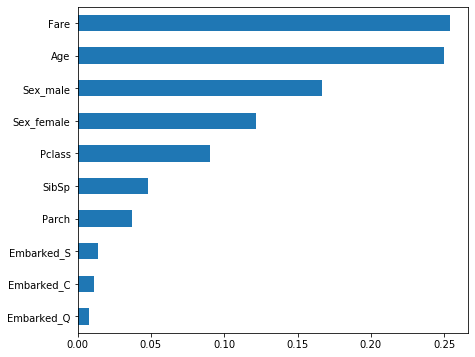

In [34]:
#from ipykernel import kernelapp as app

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(7,6))

## Parameter Optimization

### n_jobs

In [37]:
%%timeit
model = RandomForestClassifier(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(scaled_X, y)

# w/o scaler 1 loop, best of 3: 3.78 s per loop
# w/ scaler 1 loop, best of 3: 3.74 s per loop
# 1 loop, best of 3: 3.71 s per loop

2.71 s ± 118 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [38]:
%%timeit
model = RandomForestClassifier(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(scaled_X, y)

# w/o scaler 1 loop, best of 3: 2.68 s per loop
# w/ scaler 1 loop, best of 3: 2.67 s per loop
# 1 loop, best of 3: 2.78 s per loop

2.49 s ± 177 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### n_estimators

30 trees
OOB:  0.8092031425364759
 
50 trees
OOB:  0.8103254769921436
 
100 trees
OOB:  0.8047138047138047
 
200 trees
OOB:  0.8035914702581369
 
500 trees
OOB:  0.8159371492704826
 
1000 trees
OOB:  0.8148148148148148
 
2000 trees
OOB:  0.8159371492704826
 
3000 trees
OOB:  0.8170594837261503
 


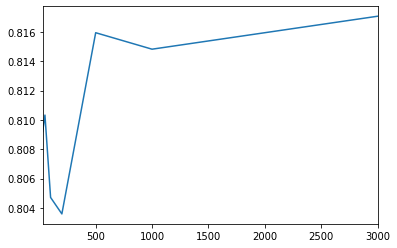

In [40]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000,3000]

for trees in n_estimator_options:
    model = RandomForestClassifier(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(scaled_X, y)
    print(trees, 'trees')
    OOB = model.oob_score_
    print('OOB: ', OOB)
    results.append(OOB)
    print (" ")
    
pd.Series(results, n_estimator_options).plot()

### max_features

auto No_Of_features
OOB:  0.8148148148148148
 
None No_Of_features
OOB:  0.8237934904601572
 
sqrt No_Of_features
OOB:  0.8148148148148148
 
log2 No_Of_features
OOB:  0.8148148148148148
 
0.9 No_Of_features
OOB:  0.8215488215488216
 
0.2 No_Of_features
OOB:  0.813692480359147
 
1 No_Of_features
OOB:  0.8148148148148148
 


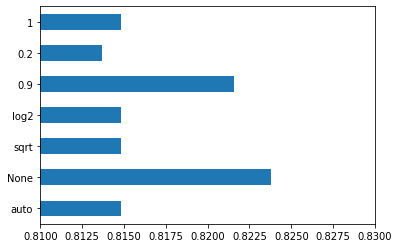

In [41]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2,1]

for max_features in max_features_options:
    model = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(scaled_X, y)
    print(max_features, "No_Of_features")
    OOB = model.oob_score_
    print('OOB: ', OOB)
    results.append(OOB)
    print (" ")
    
pd.Series(results, max_features_options).plot(kind='barh', xlim=(.81, .83))

### min_samples_leaf

1 min samples
OOB:  0.8148148148148148
 
2 min samples
OOB:  0.8294051627384961
 
3 min samples
OOB:  0.8305274971941639
 
4 min samples
OOB:  0.8260381593714927
 
5 min samples
OOB:  0.8316498316498316
 
6 min samples
OOB:  0.8294051627384961
 
7 min samples
OOB:  0.8260381593714927
 
8 min samples
OOB:  0.8237934904601572
 
9 min samples
OOB:  0.8204264870931538
 
10 min samples
OOB:  0.8215488215488216
 


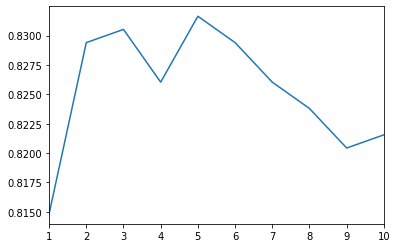

In [42]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features="auto", min_samples_leaf=min_samples)
    #model.fit(X, y)
    model.fit(scaled_X, y)
    print(min_samples, "min samples")
    OOB = model.oob_score_
    print('OOB: ', OOB)
    results.append(OOB)
    print (" ")
    
pd.Series(results, min_samples_leaf_options).plot()

w/o scaler
w/ scaler

1 min samples
C-stat:  0.864043076726
C-stat:  0.864253453914
 
2 min samples
C-stat:  0.869654022731
C-stat:  0.869563480651
 
3 min samples
C-stat:  0.871571384442
C-stat:  0.871475516356 
 
4 min samples
C-stat:  0.873478094142
C-stat:  0.873403530076
  
5 min samples
C-stat:  0.874269005848
C-stat:  0.874380851948
  
6 min samples
C-stat:  0.874029335634
C-stat:  0.874082595682
  
7 min samples
C-stat:  0.873304998988
C-stat:  0.873310324993
  
8 min samples
C-stat:  0.871866977705
C-stat:  0.871925563758
  
9 min samples
C-stat:  0.869294517411
C-stat:  0.869299843415
  
10 min samples
C-stat:  0.867430415748
C-stat:  0.867441067757 

## Final Model

In [43]:
model = RandomForestClassifier(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features=0.7, 
                              min_samples_leaf=5)
model.fit(scaled_X, y)
OOB = model.oob_score_
print('OOB: ', OOB)
# w/o scaler C-stat:  0.874269005848
# w/ scaler C-stat:  0.874380851948

OOB:  0.8294051627384961


# Train Data used again for evaluation

# Train Data Evaluation

In [44]:
train_X_evaluation = scaled_X
train_y_evaluation= y

In [45]:
pred = model.predict(train_X_evaluation)

In [46]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(train_y_evaluation, pred))

[[519  30]
 [ 71 271]]


In [57]:
from sklearn.metrics import accuracy_score
print(accuracy_score(train_y_evaluation, pred))

0.8866442199775533


In [58]:
from sklearn.metrics import classification_report
target_names=['survived','not-survived']
print(classification_report(train_y_evaluation, pred, target_names=target_names))

              precision    recall  f1-score   support

    survived       0.88      0.95      0.91       549
not-survived       0.90      0.79      0.84       342

    accuracy                           0.89       891
   macro avg       0.89      0.87      0.88       891
weighted avg       0.89      0.89      0.89       891



In [59]:
#print("c_stat: ", roc_auc_score(train_y_evaluation, pred))

In [60]:
pred.reshape(-1, 1)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
    

### Predictions

In [61]:
scaled_test = StandardScaler().fit(test).transform(test)

In [62]:
#scaled_test[:10]

In [63]:
import numpy as np
prediction=model.predict(scaled_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [80]:
print(prediction)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
